#### My work on the Chapter 4 of the book: Practical Machine Learning and Image Processing
### Content:
* Blending two images
* Changing the contrast and brightness of an image
* Adding text to images
* Smoothing images
* Changing the shape of images
* Effecting image thresholding
* Calculating gradients to detect edges
* Performing histogram equalization

# Chapter 04 
### Advanced Image Processing Using OpenCV

# Blending two images

### OpenCV imread() reads in BGR, not RGB

Testing how cv2 color works:

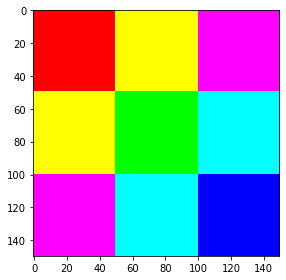

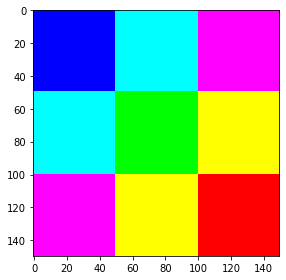

In [23]:
import cv2
from skimage import io
from pylab import *

img_cv2 = cv2.imread('../input/imgbovespa/squares.png') #same image as the below
img_io = io.imread('../input/imgbovespa/squares.png') #sam image as the above

figure(0)
io.imshow(img_cv2)
figure(1)
io.imshow(img_io)

So the same images are plotted differently above. That's because RED and BLUE channels are swapped in cv2. 

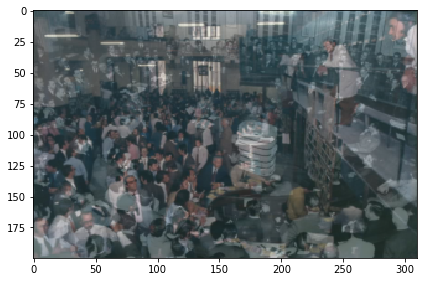

In [24]:
from skimage.transform import resize

img1 = cv2.imread('../input/imgbovespa/BOVESPA.jpg')
img2 = cv2.imread('../input/imgbovespa/BMSP.jpg')

# Setting images to the same size
img1 = resize(img1, (200, 310))
img2 = resize(img2, (200, 310))

## The dtype of the arrays with the images is float64,
## IF I DONT CONVERT ITS TYPE when I try to use the function cv2.COLOR_BGR2RGB, it throws
## the error: "Unsupported depth of input image"
img1 = np.float32(img1)
img2 = np.float32(img2)

# Converting from BGR to RGB:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Defining alpha and beta, which indicate the transparency of both images
alpha = 0.6
beta = 0.4

# Blending images
final_img = cv2.addWeighted(img1_rgb, alpha, img2_rgb, beta, 0.0) #this last parameter is gamma

io.imshow(final_img)

# Changing Contrast and Brightness

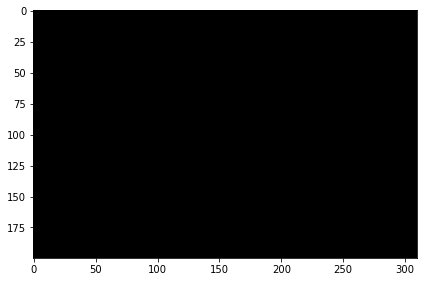

In [25]:
import numpy as np

#Creating a dummy image that stores different contrast and brightness
dummy_img = np.zeros(img1.shape, img1.dtype)
io.imshow(dummy_img)

In [26]:
dummy_img.dtype

dtype('float32')

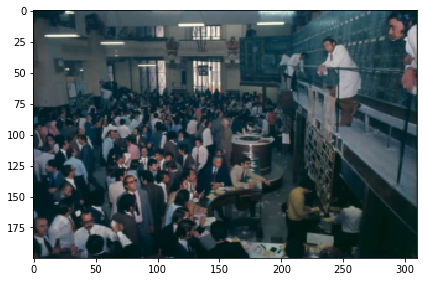

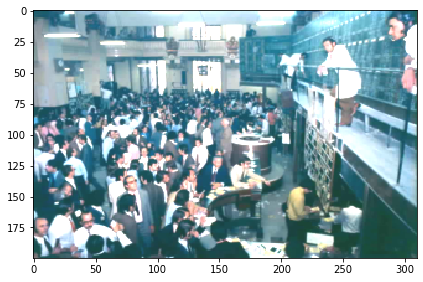

In [27]:
from pylab import *

#Setting the brightness and contrast paramenters
contrast = 2.0 # the contrast is the angular coeficient
bright = 0.1 # the bright is the linear coeficient (this value should be between the 0 and 1 in this case)

#Changing the contrast and brightness by hand
for y in range(img1_rgb.shape[0]):
    for x in range(img1_rgb.shape[1]):
        for c in range(img1_rgb.shape[2]):
            dummy_img[y,x,c] = np.clip(contrast*img1_rgb[y,x,c] + bright, 0, 1)# ( c*img[i] + b )
                                                                               # the pixel vales are 0 to 1

figure(0)
io.imshow(img1_rgb)
figure(1)
io.imshow(dummy_img)

# Adding text to images

#### `cv2.putText()` takes following arguments:
• Image • Text • Position of the text • Font type • Font scale • Color • Thickness• Type of line used

#### cv2 supports following fonts:
* `FONT_HERSHEY_SIMPLEX`
* `FONT_HERSHEY_PLAIN`
* `FONT_HERSHEY_DUPLEX`
* `FONT_HERSHEY_COMPLEX`
* `FONT_HERSHEY_TRIPLEX`
* `FONT_HERSHEY_COMPLEX_SMALL`
* `FONT_HERSHEY_SCRIPT_SIMPLEX`
* `FONT_HERSHEY_SCRIPT_COMPLEX`
* `FONT_ITALIC`

#### And these types of images:
* `FILLED`: a completely filled line
* `LINE_4`: four connected lines
* `LINE_8`: eight connected lines
* `LINE_AA`: an anti-aliasing line

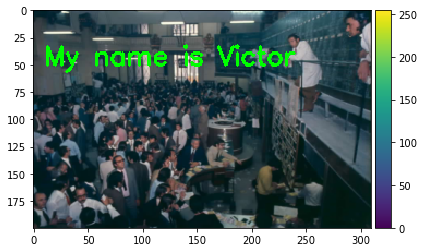

In [28]:
# Defining the font
font = cv2.FONT_HERSHEY_SIMPLEX

img = img1_rgb.copy()

# Writing on the image:
cv2.putText(img, "My name is Victor", (10, 50), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

io.imshow(img)

# Smoothing images:
This section uses 3 filters: `cv2.medianBlur`, `cv2.GausianBlur` and `cv2.bilateralFilter`

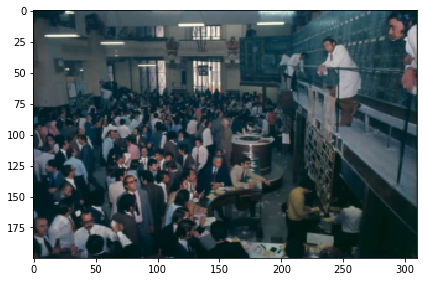

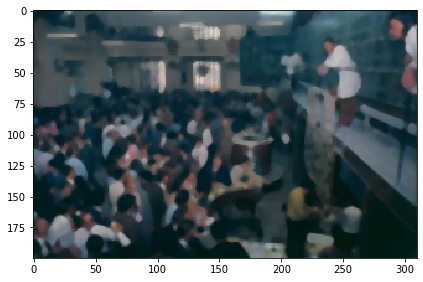

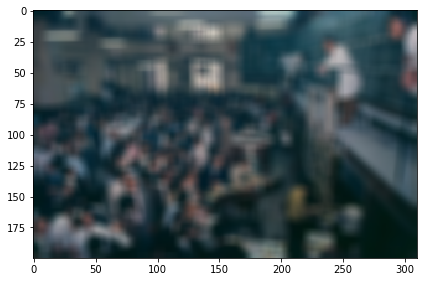

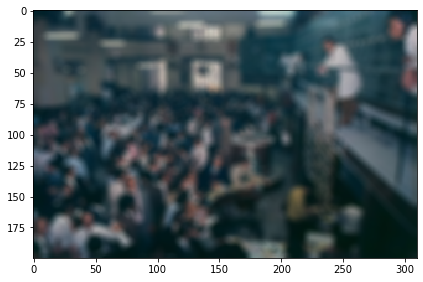

In [37]:
img_original = img1_rgb.copy()
img_MedianBlur = img1_rgb.copy()
img_GaussianBlur = img1_rgb.copy()
img_BilateralBlur = img1_rgb.copy()

#Bluring images:
img_MedianBlur = cv2.medianBlur(img_MedianBlur, 5)#(image, kernel_size)
img_GaussianBlur = cv2.GaussianBlur(img_GaussianBlur, (9, 9), 10)#(image, kernel_size, standard_deviation)
img_BilateralBlur = cv2.bilateralFilter(img_BilateralBlur, 9, 100, 75) #(image, diameter_pixel_neighborhood, sigma_value_for_color, sigma_value_for_space)

#Showing images:
figure(0)
io.imshow(img_original)
figure(1)
io.imshow(img_MedianBlur)
figure(2)
io.imshow(img_GaussianBlur)
figure(3)
io.imshow(img_BilateralBlur)

# Changing the shape of Images
Two erode or dilate an image, we first define the neighborhood kernel,
which can be done in three ways:
1. `MORPH_RECT`: to make a rectangular kernel
2. `MORPH_CROSS`: to make a cross-shaped kernel
3. `MORPH_ELLIPS`: to make an elliptical kernel

Erosion finds the maximum. Dilation finds the minumum.

`cv2.getStructuringElement()` is the function used to define the kernel and pass it down to the `cv2.erode()` or `cv2.dilate()` function.

In [39]:
print('a')

a
